In [26]:
import numpy as np

In [27]:

with open('800.out','r') as f:
    for line in f:
        if line.startswith('Query:       '):
            with open('test_800.tsv', 'a') as fout:
                    fout.write(line)
                    fout.close()
        if line.startswith('    E-value'):
            line =next(f)
            line =next(f)
            if line.startswith('\n'):
                pass
            else:
                with open('test_800.tsv', 'a') as fout:
                    fout.write(line)
                    fout.close()
            
                
                
    f.close()

In [28]:
with open('test_800.tsv', 'r') as f:
    for line in f:
        if line.startswith('Query:       '):
            titlestring = line
        if line.startswith('    '):
            #print(titlestring)
            #print(line)
            with open('800_hits.tsv', 'a') as fout:
                    fout.write(titlestring )
                    fout.write(line)
                    fout.close()
            

In [29]:
import re

In [30]:
list_class =[]
hits=[]
with open('800_hits.tsv', 'r') as f:
    for line in f:
        if line.startswith('Query:       '):
            #print(line.split('|')[2])
            list_class.append(line.split('|')[2])
            #print( re.split( '      |\n|  |    |  |   |    |  |   |    '  , next(f).strip(','))[-6:])
            for string in re.split( '      |\n|  |    |  |   |    |  |   |    '  , next(f).strip(','))[-6:]:
                if string != '' and re.match("[a-zA-Z]", string[0]):
                    #print(string)
                    hits.append(string)
                    
    f.close()
    
print(set(list_class))
#print(hits)

{'Aminocoumarins', 'Mycobacterium_tuberculosis-specific_Drug', 'Multi-drug_resistance', 'MLS', 'Trimethoprim', 'Rifampin', 'Drug_and_biocide_and_metal_resistance', 'Drug_and_biocide_resistance', 'Cationic_antimicrobial_peptides', 'Aminoglycosides', 'betalactams', 'Fluoroquinolones', 'Glycopeptides', 'Elfamycins', 'Lipopeptides', 'Phenicol', 'Fosfomycin', 'Bacitracin', 'Tetracyclines', 'Sulfonamides'}


In [31]:
unique_classes= list(set(list_class))

#print(list(set(list_class)))

In [32]:
results_dit={}

for uniqueclass in unique_classes:
    alist=[]
    for i in range(len(list_class)):
        if list_class[i] == uniqueclass:
            alist.append(hits[i])
    results_dit[uniqueclass] = alist

    
for key in results_dit:
    print(key)
    print(len(results_dit[key]))
    print(results_dit[key])
    print('--------------------------------------------------------------------------------')

Aminocoumarins
31
['gyrB', "gyrB'", "gyrB'", "gyrB'", "gyrB'", 'ybtQ', 'parE', "parE''", "parE''", "parE''", 'parE', 'parE', 'parE', 'parE', "parE'", "parE''", 'parE', 'parE', 'parE', "parE'", 'parE', 'parE', 'parE', "parE''", 'parE', "parE''", "parE''", 'parE', 'parE', 'parE', "gyrB'"]
--------------------------------------------------------------------------------
Mycobacterium_tuberculosis-specific_Drug
1
['fabI']
--------------------------------------------------------------------------------
Multi-drug_resistance
76
['ybtQ', 'yfeB', 'cfrD', 'cfrD', 'cfrD', 'cfrD', 'cfrD', 'cfrC', 'cfrD', 'cfrD', 'cfrD', 'cfrD', 'mefA', 'ybtQ', 'yfeB', 'yfeB', 'mtrC', 'pexA', 'qepA', 'tcmA', 'qacB', 'yfeB', 'ybtQ', 'ttgD', 'yfeB', 'yfeB', 'ant6Ia', 'mtrC', 'ybtQ', 'ybtQ', 'mexX', 'qacB', 'ompF', 'ompF', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'yfeB', 'LHR_kefB', 'ybtQ', 'yfeB', 'y

--------------------------------------------------------------------------------
Lipopeptides
19
['vanF', 'mcr2', 'mcr2', 'mcr8', 'mcr8', 'mcr8', 'mcr8', 'mcr8', 'mcr8', 'mcr3', 'mcr8', 'mcr8', 'mcr8', 'mcr8', 'mcr7', 'mcr8', 'phoQ', 'rpoC', 'mprF']
--------------------------------------------------------------------------------
Phenicol
18
['catA15', 'catA8', 'catA2', 'catA1', 'catA1', 'catD', 'catD', 'cmlA4', 'cmlA', 'cmlA4', 'emrD3', 'tet45', 'emrD3', 'emrD3', 'emrD3', 'tetL', 'estDL136', "tetL''"]
--------------------------------------------------------------------------------
Fosfomycin
3
["uhpT'", 'uhpT', 'ptsI']
--------------------------------------------------------------------------------
Bacitracin
1
['ybtQ']
--------------------------------------------------------------------------------
Tetracyclines
44
['tcmA', 'tcmA', 'tcmA', "tetB'", "tetB'", 'tet44', "tetB'", "tetB'", "tetB'", "tetL''", "tetL''", "tetL''", "tetL''", "tetL''", "tetL''", 'tetB', "tetB'", "tetB'", 'qacB',

In [33]:
sixmain_class = ['Aminoglycosides','betalactams','Glycopeptides','Phenicol','Tetracyclines','Trimethoprim']

for aclass in sixmain_class:
    true_po = 0
    false_po = 0
    false_ne = 0
    true_ne =0
    total_true = 0
    total = len(hits)
    value_list = results_dit[aclass]
    if aclass == 'Aminoglycosides':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'aac' or value_list[i].lower()[:3] == 'ant' or value_list[i].lower()[:3] == 'aad' or value_list[i].lower()[:3] == 'aph' or value_list[i].lower()[:3] == 'rmt':
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'aac' or hits[j].lower()[:3] == 'ant' or hits[j].lower()[:3] == 'aad' or hits[j].lower()[:3] == 'aph' or hits[j].lower()[:3] == 'rmt':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')
    if aclass == 'betalactams':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'bla' or value_list[i].lower()[:3] == 'pbp' or value_list[i].lower()[:3] == 'mec':
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'bla' or hits[j].lower()[:3] == 'pbp' or hits[j].lower()[:3] == 'mec':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')
    if aclass == 'Glycopeptides':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'van':
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'van':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')
    if aclass == 'Phenicol':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'cat' or value_list[i].lower()[:3] == 'cml' or value_list[i].lower()[:3] == 'emr' or value_list[i].lower()[:3] == 'est' or value_list[i].lower()[:3] == 'flo' or value_list[i].lower()[:3] == 'cfr':
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'cat' or hits[j].lower()[:3] == 'cml' or hits[j].lower()[:3] == 'emr' or hits[j].lower()[:3] == 'est' or hits[j].lower()[:3] == 'flo' or hits[j].lower()[:3] == 'cfr':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')
    if aclass == 'Tetracyclines':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'tet' or value_list[i].lower()[:3] == 'tcm':
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'tet' or hits[j].lower()[:3] == 'tcm':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')
    if aclass == 'Trimethoprim':
        for i in range(len(value_list)):
            if value_list[i].lower()[:3] == 'dfr' :
                true_po +=1
            else:
                false_po +=1
        for j in range(len(hits)):
            if hits[j].lower()[:3] == 'dfr':
                total_true +=1
        false_ne = total_true - true_po
        true_ne = total - true_po - false_po - false_ne
        print(aclass)
        print("accuracy is {:3f}".format(true_po/(true_po + false_po)))
        print("sensitivity is {:3f}".format(true_po/(true_po + false_ne)))
        print('---------------------------------------------------------')

Aminoglycosides
accuracy is 0.782609
sensitivity is 0.514286
---------------------------------------------------------
betalactams
accuracy is 0.977636
sensitivity is 0.998369
---------------------------------------------------------
Glycopeptides
accuracy is 1.000000
sensitivity is 0.983051
---------------------------------------------------------
Phenicol
accuracy is 0.833333
sensitivity is 0.500000
---------------------------------------------------------
Tetracyclines
accuracy is 0.954545
sensitivity is 0.591549
---------------------------------------------------------
Trimethoprim
accuracy is 1.000000
sensitivity is 0.987013
---------------------------------------------------------


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

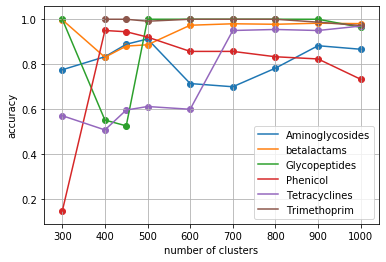

In [36]:
Aminoglycosides_acc = [0.866667,0.882353,0.782609,0.7,0.714286,0.912281,0.888889, 0.833333, 0.77551]
betalactams_acc = [0.980545, 0.982332, 0.977636, 0.979885, 0.973369, 0.886525, 0.880671, 0.831135, 0.997508]
Glycopeptides_acc = [0.964286, 1, 1, 1,1, 1, 0.526316, 0.552083, 1]
Phenicol_acc =  [0.733333, 0.823529, 0.833333, 0.857143, 0.857143, 0.920635, 0.944444, 0.95, 0.148148]
Tetracyclines_acc = [0.969697, 0.95, 0.954545, 0.95, 0.6, 0.612245, 0.596491, 0.508197, 0.571429]
Trimethoprim_acc = [0.972222, 0.987013, 1, 1, 1, 0.991228, 1, 1, np.nan]
x = [1000,900, 800, 700, 600, 500, 450, 400, 300]

plt.plot(x, Aminoglycosides_acc,label ='Aminoglycosides')
plt.plot(x, betalactams_acc,label ='betalactams')
plt.plot(x, Glycopeptides_acc,label ='Glycopeptides')
plt.plot(x, Phenicol_acc,label ='Phenicol')
plt.plot(x, Tetracyclines_acc,label ='Tetracyclines')
plt.plot(x, Trimethoprim_acc,label ='Trimethoprim')


plt.scatter(x, Aminoglycosides_acc)
plt.scatter(x, betalactams_acc)
plt.scatter(x, Glycopeptides_acc)
plt.scatter(x, Phenicol_acc)
plt.scatter(x, Tetracyclines_acc)
plt.scatter(x, Trimethoprim_acc)

#plt.title('Accuracy over different clustering threshold')
plt.xlabel('number of clusters')
plt.ylabel('accuracy')



plt.grid('True')
plt.legend()
plt.savefig('Accuracy_over_different_clustering_threshold.png')

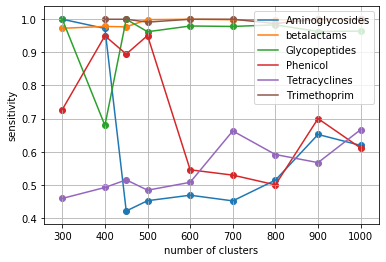

In [41]:
Aminoglycosides_sen = [0.619048, 0.652174, 0.514286, 0.451613, 0.46875, 0.452174, 0.421053, 0.972222, 1 ]
betalactams_sen = [0.99802, 0.998205, 0.998369, 0.998536, 1, 0.998858, 0.977024, 0.978261, 0.972661]
Glycopeptides_sen = [0.964286, 0.962963, 0.983051, 0.978261, 0.979592, 0.962264, 1,0.679487, 1]
Phenicol_sen = [0.611111, 0.7, 0.5,0.529412, 0.545455, 0.95082, 0.894737, 0.95, 0.727273]
Tetracyclines_sen = [0.666667, 0.567164, 0.591549, 0.662791, 0.507692, 0.483871, 0.515152, 0.492063,0.459016]
Trimethoprim_sen = [1,1,0.987013,1,1,0.991228,1,1,np.nan]
x = [1000,900, 800, 700, 600, 500, 450, 400, 300]

plt.plot(x, Aminoglycosides_sen,label ='Aminoglycosides')
plt.plot(x, betalactams_sen,label ='betalactams')
plt.plot(x, Glycopeptides_sen,label ='Glycopeptides')
plt.plot(x, Phenicol_sen,label ='Phenicol')
plt.plot(x, Tetracyclines_sen,label ='Tetracyclines')
plt.plot(x, Trimethoprim_sen,label ='Trimethoprim')


plt.scatter(x, Aminoglycosides_sen)
plt.scatter(x, betalactams_sen)
plt.scatter(x, Glycopeptides_sen)
plt.scatter(x, Phenicol_sen)
plt.scatter(x, Tetracyclines_sen)
plt.scatter(x, Trimethoprim_sen)

#plt.title('Sensitivity over different clustering threshold')
plt.xlabel('number of clusters')
plt.ylabel('sensitivity')



plt.grid('True')
plt.legend(loc = 1)
plt.savefig('Sensitivity_over_different_clustering_threshold.png')

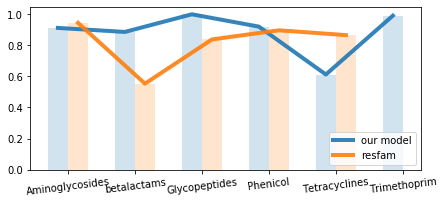

In [44]:
x_labels =['Aminoglycosides', 'betalactams', 'Glycopeptides', 'Phenicol' , 'Tetracyclines', 'Trimethoprim']

y_500_acc = [0.912281, 0.886525, 1, 0.920635, 0.612245,0.991228]
y_500_sen = [0.452174, 0.998858, 0.962264, 0.95082, 0.483871,0.991228]

y_resf_acc = [0.944954,0.553425,0.838235,0.896907,0.865854,np.nan]
y_resf_sen = [0.746377,0.882096,0.581633,0.462766,0.767568,np.nan]

barWidth = 0.3

r = np.arange(len(y_500_acc))
r_500_acc = [x + barWidth for x in r]
r_resf_acc = [x + barWidth for x in r_500_acc]



plt.figure(figsize=(7,3))
plt.bar(r_500_acc,y_500_acc, width=barWidth, alpha = 0.2)
plt.bar(r_resf_acc,y_resf_acc, width=barWidth, alpha = 0.2)
plt.plot(r_500_acc,y_500_acc, alpha = 0.9,linewidth=4.0,label='our model')
plt.plot(r_resf_acc,y_resf_acc,alpha = 0.9,linewidth=4.0,label='resfam')

#plt.title('Percentage of clusters over AMR classes with different clustering threshold')
plt.xticks([r + 1.5*barWidth for r in range(len(y_500_acc))], x_labels, rotation = 7)
plt.legend(loc=4)
plt.savefig('Accuracy of our model and resfam over six classes.png')

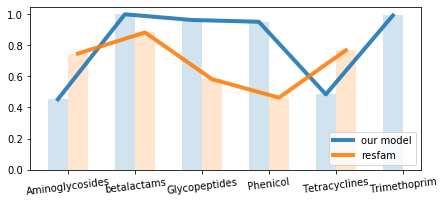

In [45]:
x_labels =['Aminoglycosides', 'betalactams', 'Glycopeptides', 'Phenicol' , 'Tetracyclines', 'Trimethoprim']

y_500_acc = [0.912281, 0.886525, 1, 0.920635, 0.612245,0.991228]
y_500_sen = [0.452174, 0.998858, 0.962264, 0.95082, 0.483871,0.991228]

y_resf_acc = [0.944954,0.553425,0.838235,0.896907,0.865854,np.nan]
y_resf_sen = [0.746377,0.882096,0.581633,0.462766,0.767568,np.nan]

barWidth = 0.3

r = np.arange(len(y_500_acc))
r_500_acc = [x + barWidth for x in r]
r_resf_acc = [x + barWidth for x in r_500_acc]



plt.figure(figsize=(7,3))
plt.bar(r_500_acc,y_500_sen, width=barWidth, alpha = 0.2)
plt.bar(r_resf_acc,y_resf_sen, width=barWidth, alpha = 0.2)
plt.plot(r_500_acc,y_500_sen, alpha = 0.9,linewidth=4.0,label='our model')
plt.plot(r_resf_acc,y_resf_sen,alpha = 0.9,linewidth=4.0,label='resfam')

#plt.title('Percentage of clusters over AMR classes with different clustering threshold')
plt.xticks([r + 1.5*barWidth for r in range(len(y_500_acc))], x_labels, rotation = 7)
plt.legend(loc=4)
plt.savefig('Sensitivity of our model and resfam over six classes.png')